# example moving average

이동 평균을 그래프로 표현하고 이동평균선 20과 120선이 교차되는 골든크로스, 데드크로스를 파악할 수 있습니다.

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_json("../data/example00593.json", orient='series')
df = df[df['date']>"2019-01-01"]
df.reset_index(inplace=True)

df

,index,date,open,high,low,close,volume
0,5431,2019-01-02,39400,39400,38550,38750,7847664
1,5432,2019-01-03,38300,38550,37450,37600,12471493
2,5433,2019-01-04,37450,37600,36850,37450,14108958
3,5434,2019-01-07,38000,38900,37800,38750,12748997
4,5435,2019-01-08,38000,39200,37950,38100,12756554
...,...,...,...,...,...,...,...
564,5995,2021-04-15,83700,84500,83400,84100,16377412
565,5996,2021-04-16,84700,84700,83600,83900,15429522
566,5997,2021-04-19,83800,84000,83300,83300,15287311
567,5998,2021-04-20,83300,84000,83100,83900,15521965


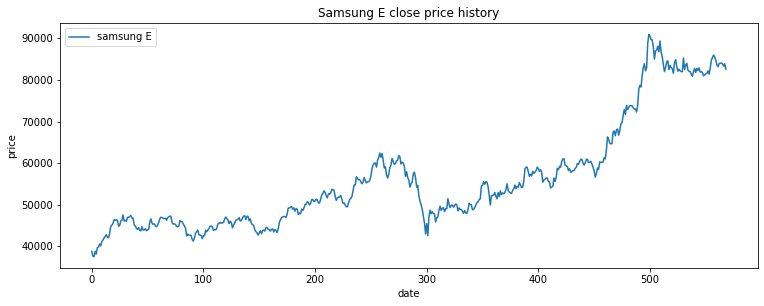

In [60]:
plt.figure(figsize=(12.5, 4.5))
plt.plot(df['close'], label='samsung E')
plt.title('Samsung E close price history')
plt.xlabel('date')
plt.ylabel('price')
plt.legend(loc='upper left')
plt.show()

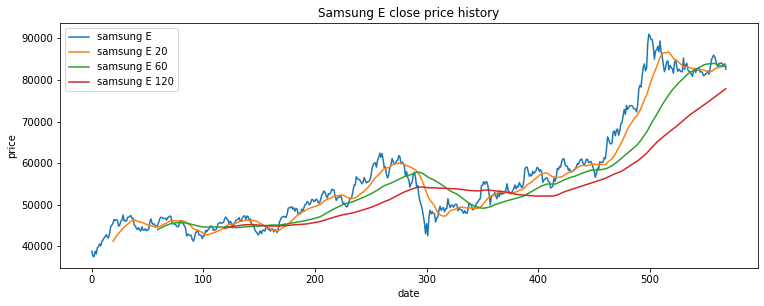

In [119]:
sma20 = pd.DataFrame()
sma60 = pd.DataFrame()
sma120 = pd.DataFrame()
sma180 = pd.DataFrame()

sma20['close'] = df['close'].rolling(window=20).mean()
sma60['close'] = df['close'].rolling(window=60).mean()
sma120['close'] = df['close'].rolling(window=120).mean()
sma180['close'] = df['close'].rolling(window=180).mean()

plt.figure(figsize=(12.5, 4.5))
plt.plot(df['close'], label='samsung E')
plt.plot(sma20['close'], label='samsung E 20')
plt.plot(sma60['close'], label='samsung E 60')
plt.plot(sma120['close'], label='samsung E 120')
plt.title('Samsung E close price history')
plt.xlabel('date')
plt.ylabel('price')
plt.legend(loc='upper left')
plt.show()

In [120]:
data = pd.DataFrame()
data['samsung'] = df['close']
data['SMA20'] = sma20['close']
data['SMA120'] = sma120['close']
data['SMA60'] = sma60['close']
data['SMA180'] = sma180['close']

## 이동평균선 골든 크로스, 데드크로스

In [156]:
def buy_sell(data):
    sigPriceBuy = []
    sigPriceSell = []
    flag = -1
    account = 1000000
    stock = 0
    for i in range(len(data)):
        if data['SMA20'][i] > data['SMA120'][i]:
            if flag != 1:
                sigPriceBuy.append(data['samsung'][i])
                current = data['samsung'][i]
                stock = int(account/current)
                account = account-(current*stock)
                sigPriceSell.append(np.nan)
                flag = 1
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        elif data['SMA20'][i] < data['SMA120'][i]:
            if flag != 0:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data['samsung'][i])
                current = data['samsung'][i]
                account = account+(current*stock)
                stock = 0
                flag = 0
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)
    basic = 1000000
    evaluation = stock*data['samsung'].iloc[-1]
    print("예수금", account)
    print("보유주식수", stock)
    print("평가금액: ", evaluation)
    print("수익금: ", evaluation-basic)
    print("수익률: ", (evaluation-basic)/basic*100,"%")
    return (sigPriceBuy, sigPriceSell)

In [157]:
def buy_sell2(data):
    sigPriceBuy = []
    sigPriceSell = []
    flag = -1
    account = 1000000
    stock = 0
    for i in range(len(data)):
        if data['SMA60'][i] > data['SMA180'][i]:
            if flag != 1:
                sigPriceBuy.append(data['samsung'][i])
                current = data['samsung'][i]
                stock = int(account/current)
                account = account-(current*stock)
                sigPriceSell.append(np.nan)
                flag = 1
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        elif data['SMA60'][i] < data['SMA180'][i]:
            if flag != 0:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data['samsung'][i])
                current = data['samsung'][i]
                account = account+(current*stock)
                stock = 0
                flag = 0
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)
    basic = 1000000
    evaluation = stock*data['samsung'].iloc[-1]
    print("예수금", account)
    print("보유주식수", stock)
    print("평가금액: ", evaluation)
    print("수익금: ", evaluation-basic)
    print("수익률: ", (evaluation-basic)/basic*100,"%")
    return (sigPriceBuy, sigPriceSell)

In [158]:
def buy_sell3(data):
    sigPriceBuy = []
    sigPriceSell = []
    flag = -1
    account = 1000000
    stock = 0
    for i in range(len(data)):
        if data['SMA20'][i] > data['SMA60'][i]:
            if flag != 1:
                sigPriceBuy.append(data['samsung'][i])
                current = data['samsung'][i]
                stock = int(account/current)
                account = account-(current*stock)
                sigPriceSell.append(np.nan)
                flag = 1
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        elif data['SMA20'][i] < data['SMA60'][i]:
            if flag != 0:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data['samsung'][i])
                current = data['samsung'][i]
                account = account+(current*stock)
                stock = 0
                flag = 0
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)
    basic = 1000000
    evaluation = stock*data['samsung'].iloc[-1]
    print("예수금", account)
    print("보유주식수", stock)
    print("평가금액: ", evaluation)
    print("수익금: ", evaluation-basic)
    print("수익률: ", (evaluation-basic)/basic*100,"%")
    return (sigPriceBuy, sigPriceSell)

In [159]:
def buy_sell4(data):
    sigPriceBuy = []
    sigPriceSell = []
    flag = -1
    account = 1000000
    stock = 0
    for i in range(len(data)):
        if data['SMA60'][i] > data['SMA120'][i]:
            if flag != 1:
                sigPriceBuy.append(data['samsung'][i])
                current = data['samsung'][i]
                stock = int(account/current)
                account = account-(current*stock)
                sigPriceSell.append(np.nan)
                flag = 1
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        elif data['SMA60'][i] < data['SMA120'][i]:
            if flag != 0:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data['samsung'][i])
                current = data['samsung'][i]
                account = account+(current*stock)
                stock = 0
                flag = 0
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)
    basic = 1000000
    evaluation = stock*data['samsung'].iloc[-1]
    print("예수금", account)
    print("보유주식수", stock)
    print("평가금액: ", evaluation)
    print("수익금: ", evaluation-basic)
    print("수익률: ", (evaluation-basic)/basic*100,"%")
    return (sigPriceBuy, sigPriceSell)

## 이동평균선 매매전략에 따른 수익률

In [160]:
print("20일 x 120일")
buy_sell = buy_sell(data)

print("60일 x 180일")
bs = buy_sell2(data)

print("20일 x 60일")
bs2 = buy_sell3(data)

print("60일 x 120일")
bs3 = buy_sell4(data)

20일 x 120일
예수금 44650
보유주식수 15
평가금액:  1239000
수익금:  239000
수익률:  23.9 %
60일 x 180일
예수금 8500
보유주식수 17
평가금액:  1404200
수익금:  404200
수익률:  40.42 %
20일 x 60일
예수금 72900
보유주식수 17
평가금액:  1404200
수익금:  404200
수익률:  40.42 %
60일 x 120일
예수금 40100
보유주식수 19
평가금액:  1569400
수익금:  569400
수익률:  56.940000000000005 %


In [163]:
data['Buy_Signal_Price'] = bs3[0]
data['Sell_Signal_Price'] = bs3[1]

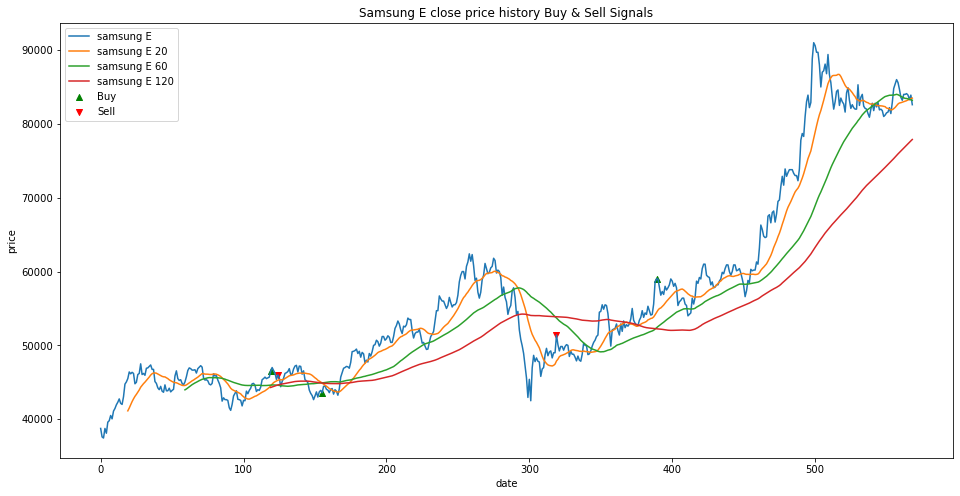

In [164]:
plt.figure(figsize=(16, 8))
plt.plot(df['close'], label='samsung E')
plt.plot(sma20['close'], label='samsung E 20')
plt.plot(sma60['close'], label='samsung E 60')
plt.plot(sma120['close'], label='samsung E 120')
plt.scatter(data.index, data['Buy_Signal_Price'], label='Buy', marker='^', color = 'green')
plt.scatter(data.index, data['Sell_Signal_Price'], label='Sell', marker='v', color = 'red')
plt.title('Samsung E close price history Buy & Sell Signals')
plt.xlabel('date')
plt.ylabel('price')
plt.legend(loc='upper left')
plt.show()

참고문헌 : https://www.youtube.com/watch?v=SEQbb8w7VTw